In [1]:
from MFEA_lib.tasks.function import Sphere, Ackley, Rosenbrock
from MFEA_lib.model.mfea import MFEA_base
from MFEA_lib.operators.CrossOver import SBX_CrossOver
from MFEA_lib.operators.Selection import ElitismSelection
from MFEA_lib.operators.Mutation import Polynomial_Mutation
from MFEA_lib.model.utils import saveModel, loadModel, compareModel
from MFEA_lib.tasks.Benchmark import CEC17_benchmark, GECCO20_benchmark_50tasks


In [2]:
tasks = [Sphere(30, bound= [-100, 100]), 
        Ackley(50, bound= [-100, 100]), 
        Rosenbrock(20, bound= [-100, 100]), 
        Rosenbrock(30, bound= [-100, 100])
]


In [3]:
model = MFEA_base()
model.compile(
    cross_over= SBX_CrossOver(nc = 15),
    mutation= Polynomial_Mutation(nm = 15),
    selection= ElitismSelection()
)
sol, his = model.fit(tasks= tasks, num_generations= 1000, num_inds_each_task= 100, rmp =0.3)


Epoch [50/1000], [=>                  ]   5% ,func_val: [3543.6386190149315, 20.731919711039502, 18390479.049810573, 79279422.63018827]

Epoch [100/1000], [==>                 ]  10% ,func_val: [312.63656039974273, 20.313138247042506, 134592.17214817012, 837030.4700312247]

Epoch [150/1000], [===>                ]  15% ,func_val: [42.69301567975118, 20.107101009771565, 4550.691074502223, 15427.132079029907]

Epoch [200/1000], [====>               ]  20% ,func_val: [7.697874015271108, 20.056809889407656, 651.8561586158792, 902.4021675230248]

Epoch [250/1000], [=====>              ]  25% ,func_val: [3.2883533371329428, 20.03054929298458, 158.4253365328255, 269.8102309510721]

Epoch [300/1000], [======>             ]  30% ,func_val: [0.6307912336347816, 20.020480387304683, 47.01691287422592, 96.09442842244142]

Epoch [350/1000], [=======>            ]  35% ,func_val: [0.3451543453687002, 20.016076847026145, 32.07819336517373, 57.47461672840714]

Epoch [400/1000], [========>           ]  

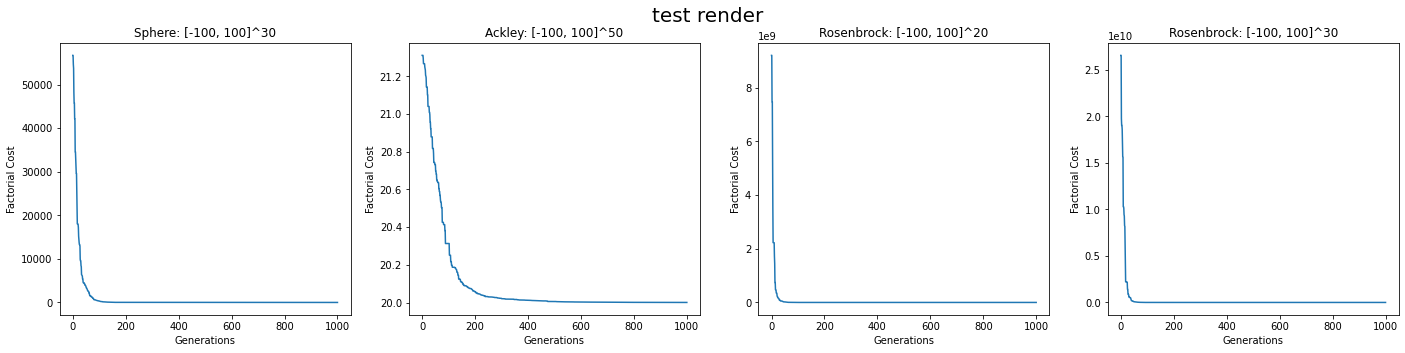

In [7]:
fig = model.render((1, 4), title= "test render")

#### Benchmark
##### CEC17


In [8]:
cec17_10tasks = CEC17_benchmark.get_10tasks_benchmark()

In [11]:
base_model = MFEA_base()
base_model.compile(
    cross_over= SBX_CrossOver(nc = 2),
    mutation= Polynomial_Mutation(nm = 5),
    selection= ElitismSelection()
)
base_sol, base_his = base_model.fit(tasks= cec17_10tasks, num_generations= 1000, num_inds_each_task= 100, rmp =0.3,
                                evaluate_initial_skillFactor= True, num_epochs_printed= 10)

saveModel(base_model, "./RESULTS/cec17_mfeabase.mso")

Epoch [100/1000], [==>                 ]  10% ,func_val: [8349.601940906536, 7927.050390117162, 11431.157220145027, 16.097221183388427, 28255284.506206617, 16.545058803905214, 41.16102739459406, 8646.457044734538, 3.6601420574190278, 4408.724932691866]

Epoch [200/1000], [====>               ]  20% ,func_val: [1031.3422601985121, 733.6544042373083, 1887.3922902331894, 10.456545614965869, 602005.3334403756, 8.589384896500343, 28.560456926647674, 6467.030407747168, 1.3340983200357095, 936.6957379439827]

Epoch [300/1000], [======>             ]  30% ,func_val: [165.57183145662458, 140.80834825980838, 305.91101257157703, 9.458680752459749, 20982.289847981534, 4.5138004883675045, 23.07657709657579, 5054.787223826004, 1.0680495545039959, 382.5339297408818]

Epoch [400/1000], [========>           ]  40% ,func_val: [32.83791568353888, 45.21461054895563, 39.70275555794598, 3.284271833995682, 2765.276327523266, 2.991093610294517, 6.9427328754217825, 4273.542312206126, 0.9852222904482021, 211.97

'Saved'

In [12]:
cec17_10tasks_fixed = CEC17_benchmark.get_10tasks_benchmark(fix= True)

In [13]:
base_model = MFEA_base()
base_model.compile(
    cross_over= SBX_CrossOver(nc = 2),
    mutation= Polynomial_Mutation(nm = 5),
    selection= ElitismSelection()
)
base_sol, base_his = base_model.fit(tasks= cec17_10tasks_fixed, num_generations= 1000, num_inds_each_task= 100, rmp =0.3,
                                evaluate_initial_skillFactor= True, num_epochs_printed= 10)

saveModel(base_model, "./RESULTS/cec17fixed_mfeabase.mso")

Epoch [100/1000], [==>                 ]  10% ,func_val: [10529.076383893227, 12753.195976402822, 9734.82641654384, 11.212014573110189, 33958717.09424695, 17.299493010127858, 38.56057678995662, 9513.79634789663, 3.593652230727346, 4010.889215327513]

Epoch [200/1000], [====>               ]  20% ,func_val: [1140.5298676256093, 1159.7518820278144, 1350.2406101058366, 6.687059017769826, 576712.426626619, 9.13957160862762, 23.72298022760964, 6506.383613006101, 1.4764503047160435, 914.720857035988]

Epoch [300/1000], [======>             ]  30% ,func_val: [222.4037837173376, 172.2351410208943, 280.2374371508962, 5.777554255146221, 31696.40685673582, 4.9886908417617555, 17.464340676969712, 4935.023110673244, 1.085773815546823, 376.4583242936381]

Epoch [400/1000], [========>           ]  40% ,func_val: [54.18573568624008, 37.3462771251111, 56.66557360163228, 5.417282253361954, 4232.15596044057, 3.0659947822192675, 15.343542485767799, 4030.014543954545, 0.7691784742790639, 205.17420808422327

'Saved'